In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class LDA:
    def __init__(self):
        self.K = 0
        self.mu_hat = []
        self.pi_hat = []
        self.sigma = 0
        self.N_train = 0
        self.N_test = 0

    def fit(self, data, response):
        self.N_train = len(response)
        self.K = len(response.unique())
        k_unique = response.unique()
        for k in range(self.K):
            self.pi_hat.append(len(response[response == k_unique[k]])/self.N_train)
            self.mu_hat.append(np.mean(data[response == k_unique[k]]))

            self.sigma = self.sigma + (np.sum((data[response == k_unique[k]] - self.mu_hat[k])**2))

        self.sigma = self.sigma/(self.N_train - self.K)
    
    def predict(self, X):
        self.N_test = len(X)
        disc_score = np.empty([self.N_test,self.K])
        prediction = np.empty(self.N_test)
        for i in range(self.N_test):
            for j in range(self.K):
                disc_score[i][j] = X[i]*self.mu_hat[j]/self.sigma - self.mu_hat[j]**2/(2*self.sigma) + np.log(self.pi_hat[j])

        for i in range(self.N_test):
            if np.argmax(disc_score[i]) == 0:
                prediction[i] = 1
            else:
                prediction[i] = 0

        return prediction
    
    def predi_proba(self, X):
        self.N_test = len(X)
        disc_score = np.empty([self.N_test,self.K])
        proba = np.empty([self.N_test,self.K])
        for i in range(self.N_test):
            for j in range(self.K):
                disc_score[i][j] = X[i]*self.mu_hat[j]/self.sigma - self.mu_hat[j]**2/(2*self.sigma) + np.log(self.pi_hat[j])

        for i in range(self.N_test):
            proba[i][0] = np.exp(disc_score[i,1])/(np.exp(disc_score[i,1]) + np.exp(disc_score[i,0]))
            proba[i][1] = 1 - proba[i][0]
        
        return proba

In [3]:
class QDA:
    def __init__(self):
        self.K = 0
        self.mu_hat = []
        self.pi_hat = []
        self.sigma = []
        self.N_train = 0
        self.N_test = 0
    
    def fit(self, data, response):
        self.N_train = len(response)
        self.K = len(response.unique())
        k_unique = response.unique()
        for k in range(self.K):
            self.pi_hat.append(len(response[response == k_unique[k]])/self.N_train)
            self.mu_hat.append(np.mean(data[response == k_unique[k]]))

            self.sigma.append(np.var(data[response == k_unique[k]]))
    
    def predict(self, X):
        self.N_test = len(X)
        disc_score = np.empty([self.N_test,self.K])
        prediction = np.empty(self.N_test)
        for i in range(self.N_test):
            for j in range(self.K):
                disc_score[i][j] = -(X[i] - self.mu_hat[j])**2/(2*self.sigma[j]) + np.log(self.pi_hat[j])

        for i in range(self.N_test):
            if np.argmax(disc_score[i]) == 0:
                prediction[i] = 1
            else:
                prediction[i] = 0

        return prediction
    
    def predi_proba(self, X):
        self.N_test = len(X)
        disc_score = np.empty([self.N_test,self.K])
        proba = np.empty([self.N_test,self.K])
        for i in range(self.N_test):
            for j in range(self.K):
                disc_score[i][j] = -(X[i] - self.mu_hat[j])**2/(2*self.sigma[j]) + np.log(self.pi_hat[j])

        for i in range(self.N_test):
            proba[i][0] = np.exp(disc_score[i,1])/(np.exp(disc_score[i,1]) + np.exp(disc_score[i,0]))
            proba[i][1] = 1 - proba[i][0]
        
        return proba
    

In [4]:
df = pd.read_csv("SouthGermanCredit.asc", delimiter=" ")
df.columns.values[:] = ["status", "duration", "credit_history", "purpose", "amount", 
                "savings", "employment_duration", "installment_rate",
                "personal_status_sex", "other_debtors",
                "present_residence", "property",
                "age", "other_installment_plans",
                "housing", "number_credits",
                "job", "people_liable", "telephone", "foreign_worker",
                "credit_risk"]
df
X, y = df["duration"], df['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [5]:
lda_home = LDA()
lda_home.fit(X, y)

prediction_home_l = lda_home.predict(X_test.to_numpy())
proba_home = lda_home.predi_proba(X_test.to_numpy())

In [6]:
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis,
      QuadraticDiscriminantAnalysis)

lda = LinearDiscriminantAnalysis().fit(X_train.to_numpy().reshape(-1, 1), y_train)

prediction_l = lda.predict(X_test.to_numpy().reshape(-1, 1))
proba = lda.predict_proba(X_test.to_numpy().reshape(-1, 1))

In [7]:
qda_home = QDA()
qda_home.fit(X, y)

prediction_home_q = qda_home.predict(X_test.to_numpy())
proba_home_q = qda_home.predi_proba(X_test.to_numpy())

In [8]:
qda = QuadraticDiscriminantAnalysis().fit(X_train.to_numpy().reshape(-1, 1), y_train)

prediction_q = qda.predict(X_test.to_numpy().reshape(-1, 1))
proba_q = qda.predict_proba(X_test.to_numpy().reshape(-1, 1))

### LDA model

- Accuracy
- ROC curve

In [9]:
from sklearn import metrics
print("The accuracy using my LDA function is: ", metrics.accuracy_score(y_test, prediction_home_l))
print("\nThe accuracy using the built-in function: ", metrics.accuracy_score(y_test, prediction_l))

The accuracy using my LDA function is:  0.7272727272727273

The accuracy using the built-in function:  0.7272727272727273


/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_18201/250108866.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_home, tpr_home, 'b', color = 'green', label = "My LDA")


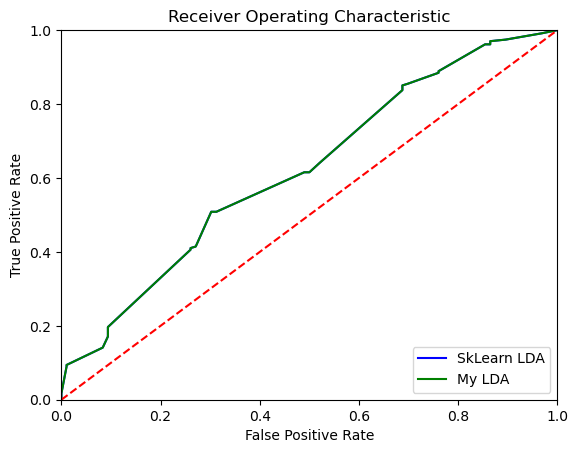

In [10]:
fpr_home, tpr_home, threshold = metrics.roc_curve(y_test, proba_home[:,1])

fpr, tpr, threshold = metrics.roc_curve(y_test, proba[:,1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "SkLearn LDA")
plt.plot(fpr_home, tpr_home, 'b', color = 'green', label = "My LDA")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### QDA model

- Accuracy
- ROC curve

In [11]:
print("The accuracy using my QDA function is: ", metrics.accuracy_score(y_test, prediction_home_q))
print("\nThe accuracy using the built-in function: ", metrics.accuracy_score(y_test, prediction_q))

The accuracy using my QDA function is:  0.7242424242424242

The accuracy using the built-in function:  0.7242424242424242


/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_18201/1725996259.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_home, tpr_home, 'b', color = 'green', label = "My QDA")


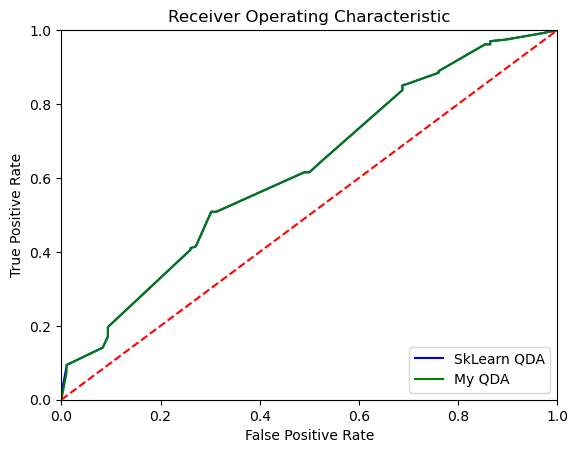

In [12]:
fpr_home, tpr_home, threshold = metrics.roc_curve(y_test, proba_home_q[:,1])

fpr, tpr, threshold = metrics.roc_curve(y_test, proba_q[:,1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "SkLearn QDA")
plt.plot(fpr_home, tpr_home, 'b', color = 'green', label = "My QDA")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()